# Correlation analysis between the Bitcoin currency and Twitter

This project consists of a correlation analysis between the Bitcoin currency and tweets. In order to define the positiveness of a tweet (if the course of the bitcoin will go up or down), we realise a sentiment analysis of each tweet using the VADER algorithm. Finally we try to find a correlation between the two and we will make some machine learning to make predictions.

## Sentiment analysis

### Import Twython
I use the *twython* package as my Python interface with the Twitter API: https://twython.readthedocs.io/en/latest/usage/starting_out.html

Let's import the twython package, which we installed earlier using *pip install twython* from the command line.

In [2]:
from twython import Twython

### OAuth2 Authentication (*app* authentication)
Here we use the method *OAuth2* along with the Twithon library to authenticate on the twitter API.

OAuth1 will give you *user* access to the API, whereas OAuth2 will give the *app* access. For academic use the rate limits are generally better for *OAuth2* (app) authentication, with a few exceptions. For a chart showing the API limits for user and app authentication for the various parts of the Twitter API, see this chart: https://dev.twitter.com/rest/public/rate-limits

Running the code block below shows that we now have a rate limit of 450 API calls. This means we can make 450 different calls to the API within the current 15-minute window. With the search API we can access 100 tweets per call. This means that, if we were downloading tweets with a specific hashtag, such as *#arnova16*, we could download 450 $\times$ 100 or 45,000 tweets per window. This is much better than the 18,000 tweets we can access using the OAuth1 or user authentication.

In [3]:
APP_KEY = 'mPQKoRwd2Pb9qpQyQmyG5s8KR'
APP_SECRET = 'HLvIhusvfzDLKaRXY8CnZGP143kp3E3f2KqQBIEMfVL5mOxZjq'
twitter = Twython(APP_KEY, APP_SECRET, oauth_version=2)
ACCESS_TOKEN = twitter.obtain_access_token()
twitter = Twython(APP_KEY, access_token=ACCESS_TOKEN)
twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 450, 'remaining': 450, 'reset': 1526168098}}

### Query the twitter API
Here we query the twitter API to get the latest tweets about bitcoin. Then we transform it to store only the useful data inside a Pandas Dataframe.

In [4]:
NUMBER_OF_QUERIES = 1
data = {}
next_id = ""
for i in range(NUMBER_OF_QUERIES):
    if not next_id:
        data = twitter.search(q='#bitcoin', lang='en', result_type='recent', count="1000") # Use since_id for tweets after id
        print(data)
    else:
        data["statuses"].extend(twitter.search(q='#bitcoin', lang='en', result_type='recent', count="1000", max_id=next_id)["statuses"])
    next_id = data["statuses"][len(data["statuses"]) - 1]['id']

{'statuses': [{'created_at': 'Sat May 12 23:19:40 +0000 2018', 'id': 995443418967957504, 'id_str': '995443418967957504', 'text': 'RT @appics_official: "APPICS is more than just a mobile APP that lets users monetize their posts and even their voting, "like". APPICS is a…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'appics_official', 'name': 'Appics', 'id': 871001313437470720, 'id_str': '871001313437470720', 'indices': [3, 19]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 949782486162186240, 'id_str': '949782486162186240', 'name': 'Naretev', 'screen_name': 'Naretev14', 'location': '', 'description': '', 'url': None, 'entities': 

In [9]:
import json
import pandas as pd
import io

d = pd.DataFrame([[s["text"], s["user"]["name"], s["user"]["followers_count"], s["retweet_count"], s["created_at"]] for s in data["statuses"]], columns=('Text', 'UserName', "UserFollowerCount", 'RetweetCount', "CreatedAt"))
f = open('twitter.csv', 'a', encoding='utf-8')
d.to_csv(f, mode='a', header=False, encoding='utf-8')
f.close()

In [6]:
d

,Text,UserName,UserFollowerCount,RetweetCount,CreatedAt
0,Bitcoin And Ethereum: Ultimate Guide To Invest...,Blockchain,17571,0,Fri Apr 20 06:40:57 +0000 2018
1,RT @RandolphMlny: #Bitcoin #Satoshi #crypto #b...,Earn Money Online Opportunity,502,7,Fri Apr 20 06:40:52 +0000 2018
2,RT @bethereumteam: Another great #networking s...,sanjit,48,902,Fri Apr 20 06:40:52 +0000 2018
3,RT @bethereumteam: Another great #networking s...,nguyenduyanh01,957,902,Fri Apr 20 06:40:51 +0000 2018
4,RT @ExtrabitLtd: Davos 2018: Blockchain Techno...,Twity Bert,2884,108,Fri Apr 20 06:40:49 +0000 2018
5,RT @ValoremF: Valorem have now the Airdrop fac...,Farah Fatimah,1333,48,Fri Apr 20 06:40:49 +0000 2018
6,RT @hackapreneur: Got some crypto socks via ht...,Yoann ferrier,40,4,Fri Apr 20 06:40:45 +0000 2018
7,RT @buellerff: Bought 563 bitcoin in 2011 for ...,Lorraine Saunder,52,58492,Fri Apr 20 06:40:45 +0000 2018
8,#crypto mkt cap last hour\n\n🚀\n$BTC +191.741m...,analyst5,5516,0,Fri Apr 20 06:40:44 +0000 2018
9,RT @SocialWalletInc: Too much of the world’s #...,Sabitcoinsha Chervachuk,3288,1453,Fri Apr 20 06:40:43 +0000 2018


### VADER
Here we do the sentiment analysis to calculate the sentiment score for each tweet with the VADER algorithm. Then we add the number of retweets of each tweet as a weight to the score.

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#neg = []
#neu = []
#pos = []
compound = []
for i,s in enumerate(d['Text']):
    vs = analyzer.polarity_scores(s)
    #print("{:-<65} {}".format(s, str(vs)))
    #neg.append(vs["neg"])
    #neu.append(vs["neu"])
    #pos.append(vs["pos"])
    compound.append(vs["compound"])
#d["neg"] = pd.Series(neg)
#d["neu"] = pd.Series(neu)
#d["pos"] = pd.Series(pos)
d["compound"] = pd.Series(compound)

d

,Text,UserName,UserFollowerCount,RetweetCount,CreatedAt,compound
0,Bitcoin And Ethereum: Ultimate Guide To Invest...,Blockchain,17571,0,Fri Apr 20 06:40:57 +0000 2018,0.0000
1,RT @RandolphMlny: #Bitcoin #Satoshi #crypto #b...,Earn Money Online Opportunity,502,7,Fri Apr 20 06:40:52 +0000 2018,-0.4404
2,RT @bethereumteam: Another great #networking s...,sanjit,48,902,Fri Apr 20 06:40:52 +0000 2018,0.8858
3,RT @bethereumteam: Another great #networking s...,nguyenduyanh01,957,902,Fri Apr 20 06:40:51 +0000 2018,0.8858
4,RT @ExtrabitLtd: Davos 2018: Blockchain Techno...,Twity Bert,2884,108,Fri Apr 20 06:40:49 +0000 2018,-0.3182
5,RT @ValoremF: Valorem have now the Airdrop fac...,Farah Fatimah,1333,48,Fri Apr 20 06:40:49 +0000 2018,0.5106
6,RT @hackapreneur: Got some crypto socks via ht...,Yoann ferrier,40,4,Fri Apr 20 06:40:45 +0000 2018,0.0000
7,RT @buellerff: Bought 563 bitcoin in 2011 for ...,Lorraine Saunder,52,58492,Fri Apr 20 06:40:45 +0000 2018,0.0000
8,#crypto mkt cap last hour\n\n🚀\n$BTC +191.741m...,analyst5,5516,0,Fri Apr 20 06:40:44 +0000 2018,0.0000
9,RT @SocialWalletInc: Too much of the world’s #...,Sabitcoinsha Chervachuk,3288,1453,Fri Apr 20 06:40:43 +0000 2018,0.5994


In [8]:
scores = []
for i,s in d.iterrows():
    scores.append(s["compound"] * ((s["RetweetCount"]+1)/1000) * ((s["UserFollowerCount"]+1)/1000))
    print(s["compound"] * ((s["RetweetCount"]+1)/1000) * ((s["UserFollowerCount"]+1)/1000))
d["Scores"] = pd.Series(scores)

0.0
-0.0017721696
0.039193992600000005
0.7662825492
-0.100062763
0.033375879600000005
0.0
0.0
0.0
2.8664542764000003
0.0
0.0056200056
0.0374906448
-6.926660479999999
0.0
5.0072400576
2.9963038770000003
0.3294057134
1.184e-05
0.0024021102000000003
0.0
0.0
0.004096008
7.400009999999999e-05
0.0012161919
0.0
-0.0019028380000000002
0.0
0.0001760132
-0.23826432
0.0
0.00016677
3.6407999999999994e-05
0.052842259999999995
0.0
0.0021865788
0.0
0.0
0.0
-0.0003495908
0.0
-0.000235904
0.0
-0.006878447999999999
0.0
0.0
0.0
0.0
0.0390208752
0.0
0.0007589207999999999
0.0
0.006559836800000001
0.0047178495
0.013394612
2.1201342192
0.0
0.040793747400000004
0.0
3.7e-05
2.2164602754000002
0.0
0.0
0.9528008683
0.0045143984
0.0025608735999999997
0.0
0.009218006
0.28693056
-0.0038164424000000003
-0.007792841000000001
0.0
0.0
0.0
0.0030320324999999998
0.0
0.0
0.0
0.0
-0.0003125408
0.0
0.1632138816
3.4539461285
0.0
0.0
0.25030906999999997
0.0023859262
0.002503116
1.0743838182
0.0
0.0974326797
0.009094932
1.7851

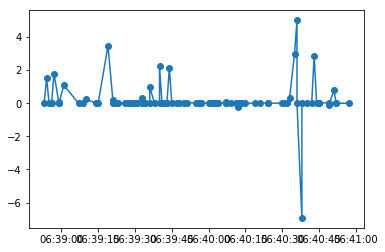

In [17]:
import matplotlib.pyplot as plt
#d['CreatedAt'] = pd.to_datetime(d['CreatedAt'])
#d.index = d['CreatedAt']
#d2 = d.groupby(d.index.hour).mean()
#print(d2)
plt.plot_date(d["CreatedAt"], d["Scores"], ls='-', marker='o')
plt.show()

## Retrieve the Bitcoin currency
Here we use the Kraken API.

TODO Do we retrieve data from multiple API (maybe they don't have the same prices).

TODO Maybe we should make a daily prevision

In [18]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime

In [19]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [12]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [13]:
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')


Loaded BCHARTS/KRAKENUSD from cache


In [14]:
btc_usd_price_kraken.head()


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [20]:
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price'])
py.iplot([btc_trace])

## Correlation analysis
Here we make the correlation analysis between Bitcoin currency and tweets.

We can test our correlation hypothesis using the Pandas corr() method, which computes a Pearson correlation coefficient for each column in the dataframe against each other column.

In [22]:
d.corr(btc_usd_price_kraken.reindex(d.index, method='pad'))

TypeError: Cannot compare type 'Timestamp' with type 'int'

# TODO Check tythonstreamer?

Stream the new tweets without limit?? It would be nice for realtime predictions

In [16]:
from twython import TwythonStreamer

class MyStreamer(TwythonStreamer):
    def on_success(self, data):
        if 'text' in data:
            print(data['text'])

    def on_error(self, status_code, data):
        print(status_code)

        # Want to stop trying to get data because of the error?
        # Uncomment the next line!
        # self.disconnect()
OAUTH_TOKEN = "3459248236-0XPtHldG3ou6BfpTwaKWnOL2ywFk2niQekLwE7K"
OAUTH_TOKEN_SECRET = "08Vy2wuOkp7AmuC3rbjCHFJ94MLG2sWqdvGQtoiXmkVKr"

stream = MyStreamer(APP_KEY, APP_SECRET,
                    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
stream.statuses.filter(track='bitcoin')

#Crypto #Blockchain #GlobalREIT #BlockchainBasedREIT #ethereum #bitcoin #cryptocurrency #btc. https://t.co/mq7RPloY2v
RT @bethereumteam: 50% bonus 1 HOUR LEFT! 🔥
Get your generous early-adopter bonus on: https://t.co/VupC9N9Dcm
#Crypto #Bitcoin #Ethereum #B…
RT @APompliano: Modern warfare:

1. Russia asks Telegram for encrypted, private data

2. Telegram CEO @durov says “no”

3. Russia bans Tele…
RT @THUGCOIN: OUR SPECIAL THUG QUIZ #AIRDROP JUST CLOSED!

Thanks to all participants for joining our badass event!

Your 500 - 5K #THUG wi…
This lil episode just consists of me talking about bitcoin. That alone should be enough incentive for you to listen… https://t.co/HDrP4GHSGe
RT @SocialWalletInc: Ethereum’s price hit a high of $881.94 USD on 19th Dec, 2017. #Bitcoin #btc #Ethereum #eth #litecoin #ltc #blockchaint…
RT @ExtrabitLtd: What is the best energy tariff for a bitcoin miner? https://t.co/6To3ypOXxU via @ThisIsMoney #Extrabit is about to change…
RT @withcryptomill: have good feeling

KeyboardInterrupt: 